In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from termcolor import colored
from sklearn.preprocessing import StandardScaler

In [21]:
def count_plot(x, hue, m, data,timon):
    plt.figure(figsize=(15,5))
    ax = plt.subplot(121)
    ax = sns.countplot(x = x, hue=hue, data=data, palette="Set1")
    ax.set_title(f'Diagrama de barras {m}', size=12)
    ax.set_ylabel('Observaciones', size=12)
    ax.set_xlabel(x,size=12)
    ax = plt.subplot(122)
    ax = mosaic(timon, title= f'Diagrama de mosaico {m}', ax=ax)   

In [138]:
def graf_plot(X,y,v1,v2):
    plt.figure(figsize=(18,5))
    ax = plt.subplot(131)
    ax.set_title(f'Histograma {X} vs {y}')
    ax = sns.distplot(data[data[y] == v1][X], bins=10, kde= False, label= v1, color='orange')
    ax = sns.distplot(data[data[y] == v2][X], bins=10, kde= False, label= v2, color='b')
    ax.axvline(data[data[y] == v1][X].mean(), c='r', linestyle = '--', label = 'Promedio')
    ax.axvline(data[data[y] == v1][X].median(), c='black', linestyle = '--', label = 'Mediana')
    ax.set_ylabel('Observaciones', size=12)
    ax.legend()
    
    ax = plt.subplot(132)
    ax.set_title(f'Densidad {X} vs {y}')
    ax = sns.distplot(data[data[y] == v1][X], hist = False, bins=10, label = v1,color='orange')
    ax = sns.distplot(data[data[y] == v2][X], hist = False, bins=10, label = v2,color='b')
    ax.axvline(data[data[y] == v1][X].mean(), c='r', linestyle = '--', label = 'Promedio')
    ax.axvline(data[data[y] == v1][X].median(), c='black', linestyle = '--', label = 'Mediana')
    ax.legend()
    
    ax = plt.subplot(133)
    ax.set_title(f'Diagrama de cajas {X} vs {y}')
    ax = sns.boxplot(data = data, x=X, y=y)

# Preparación de los datos
#### Descripción de las caracteristicas ('features')
- Name: Nombre de la ventana de tiempo
- Netflows: Cantidad de Netflows en la ventana de tiempo
- First Protocol: Top 1 de los protocolos usados en la ventana de tiempo
- Second_Protocol: Top 2 de los  protocolos usados en la ventana de tiempo
- Third_Protocol: Top 3 de los  protocolos usados en la  ventana de tiempo
- P1_d: Percentil: 25% de todas las duraciones en la ventana de tiempo
- P2_d: Percentil:50% de todas las duraciones en la ventana de tiempo
- P3_d: Percentil:75% de todas las duraciones en la ventana de tiempo
- Duration: Duración total de la ventana de tiempo
- Max_d: Valor máximo de todas las duraciones en la ventana de tiempo
- Min_d: Valor mínimo de todas las duraciones en la ventana de tiempo
- Packets: Número total de paquetes en la ventana de tiempo
- Avg_bps: Promedio de bits por segundo en la ventana de tiempo
- Avg_pps: Promedio de paquetes por segundo en la ventana de tiempo
- Avg_bpp: Promedio de bytes por paquete en la ventana de tiempo
- Bytes: Número total de bytes en la ventana de tiempo
- Number_sp: Número total de puertos de origen usados en la ventana de tiempo
- Number_dp: Número total de puertos de destino usados en la ventana de tiempo
- First_sp: Top 1 de los puertos de origen en la ventana de tiempo
- Second_sp: Top 2 de los puertos de origen en la  ventana de tiempo
- Third_sp: Top 3 de los puertos de origen en la ventana de tiempo
- First_dp: Top 1 de los puertos de destino en la ventana de tiempo
- Second_dp: Top 2 de los puertos de destino en la ventana de tiempo
- Third_dp: Top 3 de los puertos de destino en la ventana de tiempo
- P1_ip: Percentil 25% de todas las entradas de paquetes en la ventana de tiempo
- P2_ip: Percentil 50% de todas las entradas de paquetes en la ventana de tiempo
- P3_ip: Percentil 75% de todas las entradas de paquetes en la ventana de tiempo
- P1_ib: Percentil 25% de todas las entradas de bytes en la ventana de tiempo
- P2_ib: Percentil 50% de todas las entradas de bytes en la ventana de tiempo
- P3_ib: Percentil 75% de todas las entradas de bytes en la ventana de tiempo
- Type: Tipo de ventana de tiempo (Minera/No minera)


In [4]:
print(colored(f'Cargamos los datos', attrs=['bold']))
data = pd.read_csv('./data_identificada.csv')
data.head()

Cargamos los datos


index             Name  Netflows First_Protocol Second_Protocol  \
0    310  11-csves/17.csv        28            TCP             NaN   
1    185   30-csves/4.csv         2            TCP             NaN   
2    539   31-csves/3.csv        13            TCP             NaN   
3    926  100-csves/0.csv         2            TCP             NaN   
4    430  14-csves/20.csv         2            TCP             NaN   

  Third_Protocol       p1_d     p2_d      p3_d  duration  ...  second_dp  \
0            NaN    8.21225   14.290   25.6010   518.083  ...     4444.0   
1            NaN  173.24750  173.265  173.2825   346.530  ...    52447.0   
2            NaN    3.21500    9.253   47.2220   308.294  ...     4444.0   
3            NaN  300.01150  300.012  300.0125   600.024  ...    58780.0   
4            NaN  596.98150  596.982  596.9825  1193.964  ...     4444.0   

   third_dp   p1_ip  p2_ip   p3_ip    p1_ib    p2_ib    p3_ib  Type  \
0       NaN    7.00    8.0   14.75    362.0   1054.0   1918.0  mine   
1       NaN    8.00    8.0    8.00   2149.0   4138.0   6127.0  mine   
2       NaN    3.00    6.0   25.00    307.0    994.0   1355.0  mine   
3       NaN  169.25  175.5  181.75  16041.0  24096.0  32151.0  mine   
4       NaN  319.25  330.5  341.75  29932.5  44353.0  58773.5  mine   

   Cryptocurrency  
0        Etherium  
1         Bitcoin  
2        Etherium  
3        Etherium  
4        Etherium  

[5 rows x 33 columns]

### Estructuración del conjunto de datos
Agrupación de las variables cuantitativas y categóricas por separado.

In [5]:
data_numeric = (data.dtypes == "int64") | (data.dtypes == "float64")
data_object  = (data.dtypes == "object")
data_numeric = [c for c in data_numeric.index if data_numeric[c]]
data_object = [c for c in data_object.index if data_object[c]]

# Inspección datos 

### Variables Categoricas

UDP   TCP  ICMP  ICMP6
not_mine  504  1995     1      1
mine        0  2232     0      0

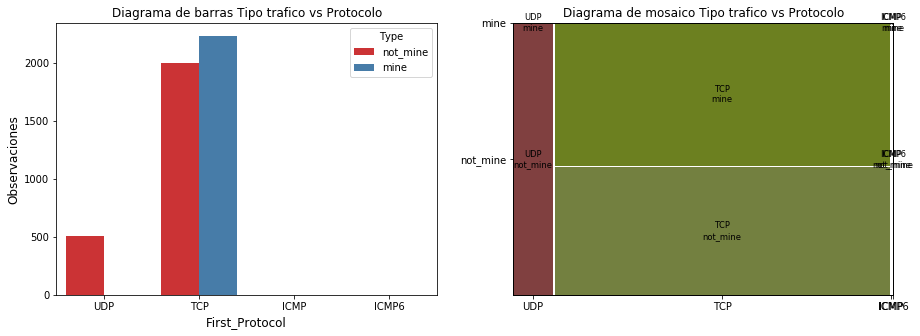

In [26]:
A = 'First_Protocol'
B = 'Type'
m = 'Tipo trafico vs Protocolo'
x = list(data[A].unique())
y = list(data[B].unique())

tuples = list(product(x,y))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
account = []
for i in range(len(tuples)):
    v = data.loc[(data[A]==tuples[i][0]) & (data[B]==tuples[i][1])].shape[0]
    account.append(v)
datas = pd.Series(account, index=index)
table = np.reshape(account,(2,4), order='F')
table_conti = pd.DataFrame(table, columns = x, index= y)
count_plot(data_object[0], B, m, data, datas)
display(table_conti)

Does_not_have  Etherium  Bitcoin  Litecoin  Monero  Bitcash
not_mine           2501         0        0         0       0        0
mine                  0       959      247       349     192      485

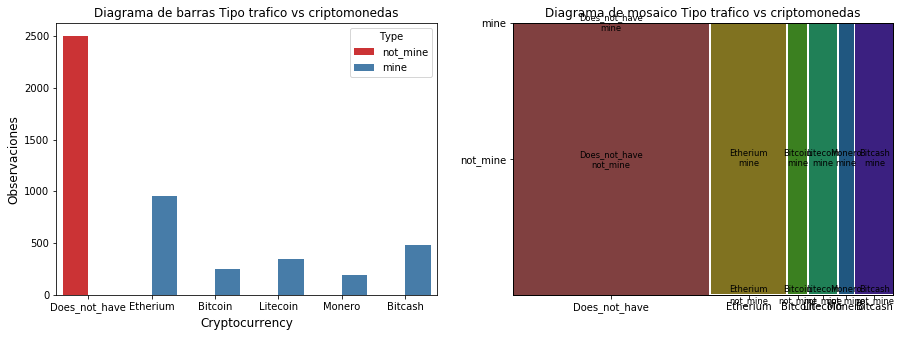

In [27]:
A = 'Cryptocurrency'
B = 'Type'
m = 'Tipo trafico vs criptomonedas'
x = list(data[A].unique())
y = list(data[B].unique())

tuples = list(product(x,y))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
account = []
for i in range(len(tuples)):
    v = data.loc[(data[A]==tuples[i][0]) & (data[B]==tuples[i][1])].shape[0]
    account.append(v)
datas = pd.Series(account, index=index)
table = np.reshape(account,(2,6), order='F')
table_conti = pd.DataFrame(table, columns = x, index= y)
count_plot(data_object[2], B, m, data, datas)
display(table_conti)

Does_not_have  Etherium  Bitcoin  Litecoin  Monero  Bitcash
UDP              504         0        0         0       0        0
TCP             1995       959      247       349     192      485
ICMP               1         0        0         0       0        0
ICMP6              1         0        0         0       0        0

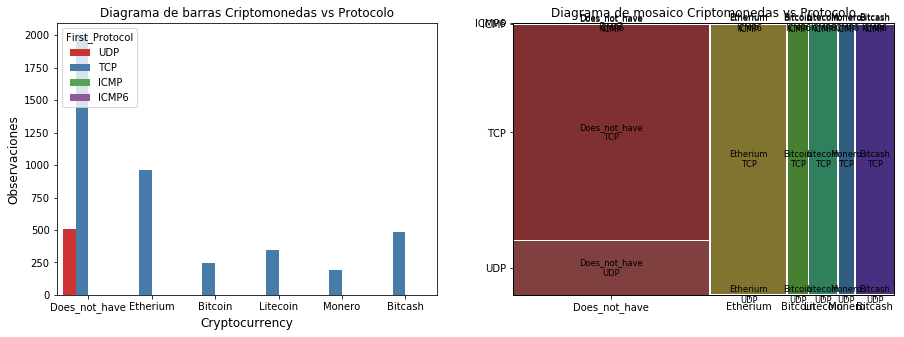

In [28]:
A = 'Cryptocurrency'
B = 'First_Protocol'
m = 'Criptomonedas vs Protocolo'
x = list(data[A].unique())
y = list(data[B].unique())

tuples = list(product(x,y))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
account = []
for i in range(len(tuples)):
    v = data.loc[(data[A]==tuples[i][0]) & (data[B]==tuples[i][1])].shape[0]
    account.append(v)
datas = pd.Series(account, index=index)
table = np.reshape(account,(4,6), order='F')
table_conti = pd.DataFrame(table, columns = x, index= y)
count_plot(data_object[2], B, m, data, datas)
display(table_conti)

### Variables Continuas

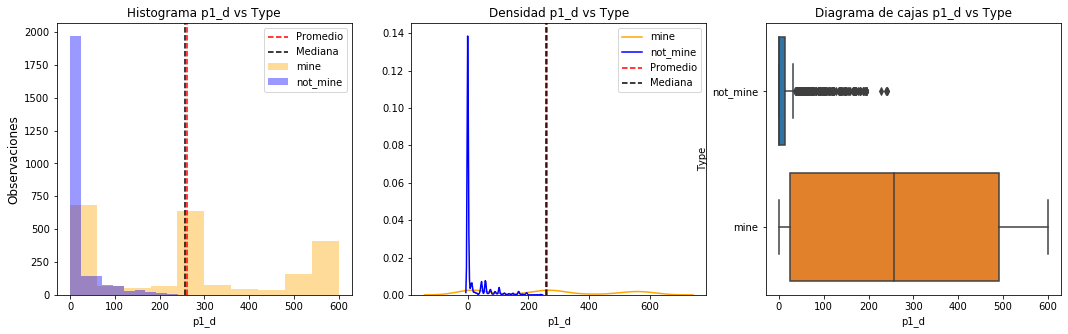

In [140]:
graf_plot(data_numeric_float[0],'Type','mine','not_mine')

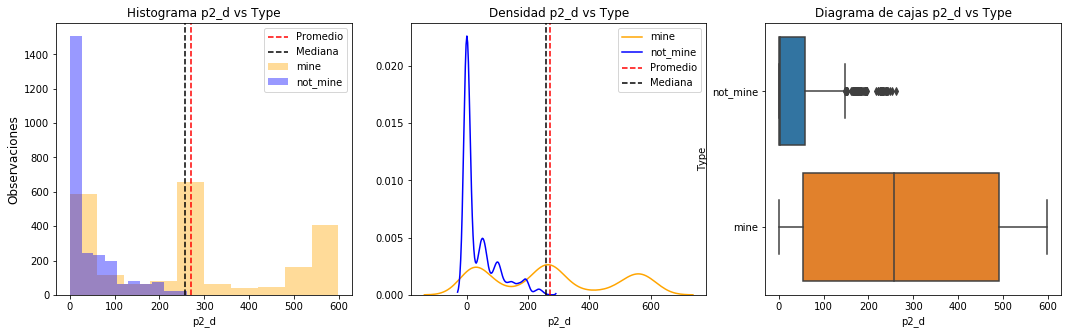

In [141]:
graf_plot(data_numeric_float[1],'Type','mine','not_mine')

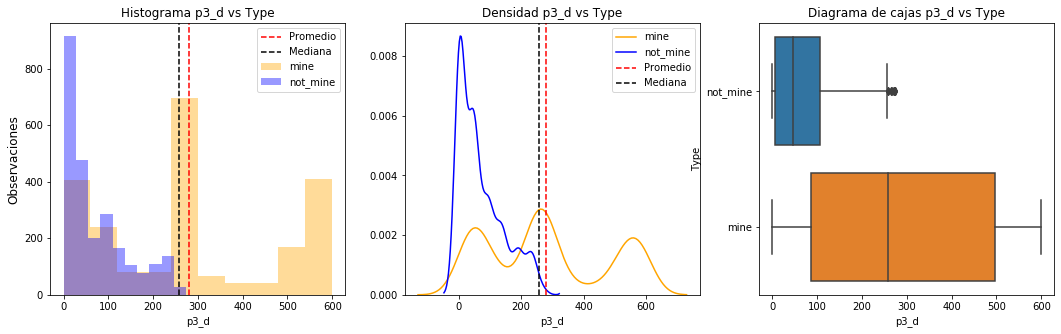

In [142]:
graf_plot(data_numeric_float[2],'Type','mine','not_mine')

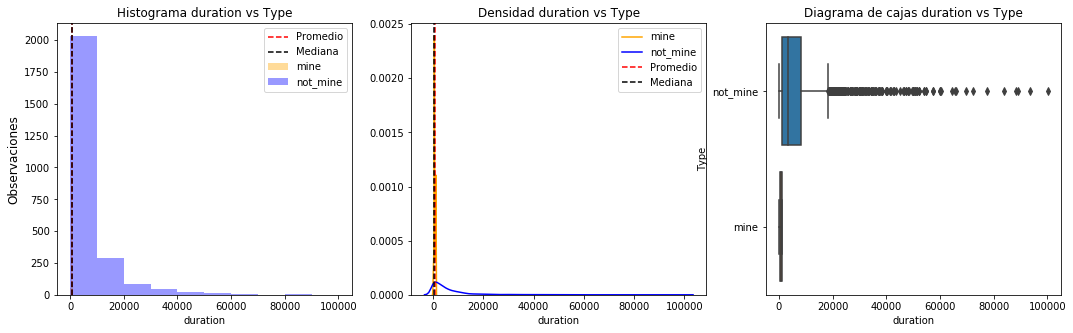

In [143]:
graf_plot(data_numeric_float[3],'Type','mine','not_mine')

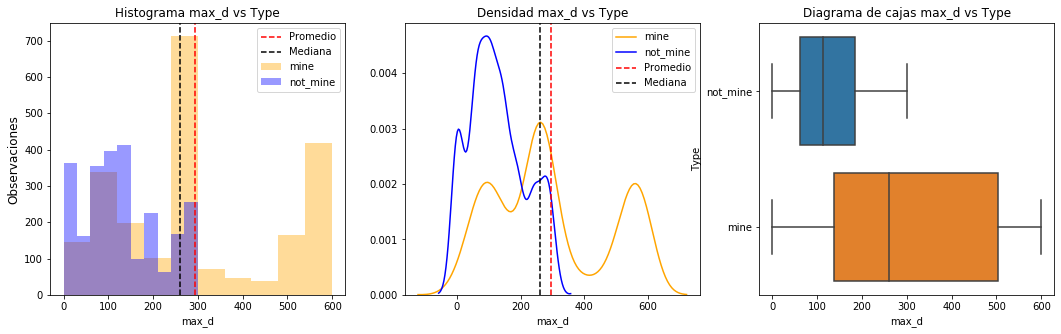

In [144]:
graf_plot(data_numeric_float[4],'Type','mine','not_mine')

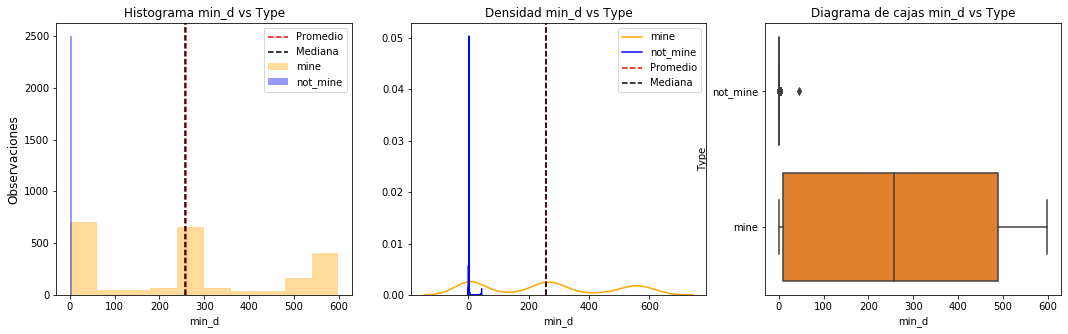

In [145]:
graf_plot(data_numeric_float[5],'Type','mine','not_mine')

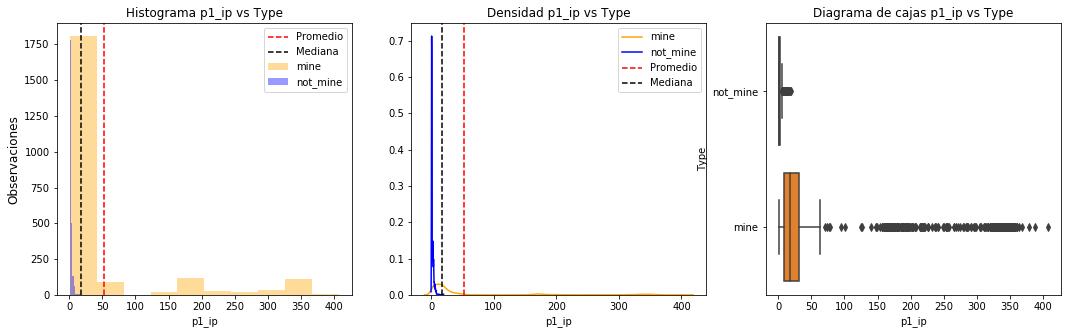

In [146]:
graf_plot(data_numeric_float[6],'Type','mine','not_mine')

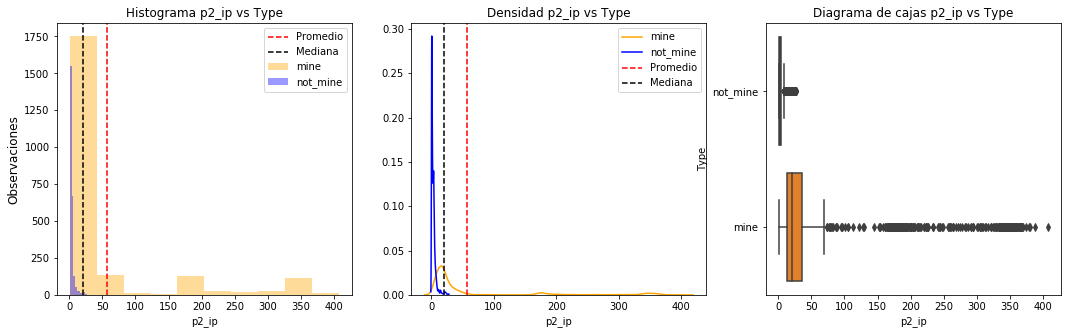

In [147]:
graf_plot(data_numeric_float[7],'Type','mine','not_mine')

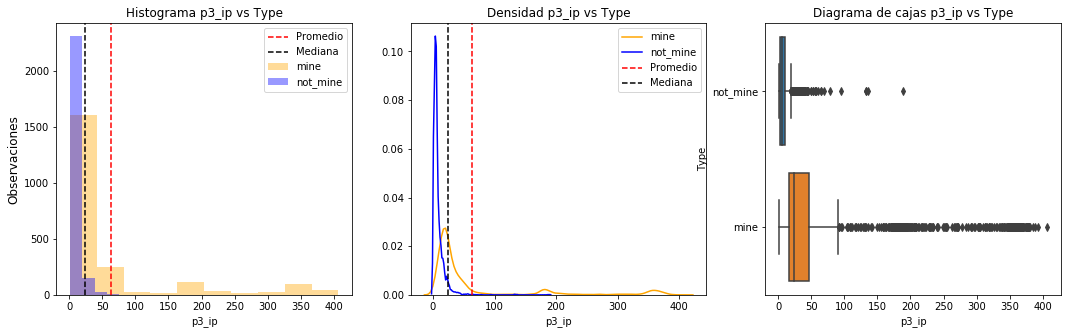

In [148]:
graf_plot(data_numeric_float[8],'Type','mine','not_mine')

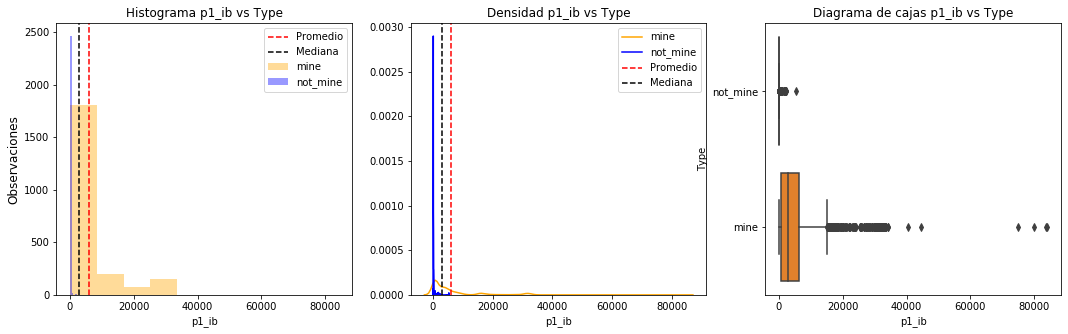

In [149]:
graf_plot(data_numeric_float[9],'Type','mine','not_mine')

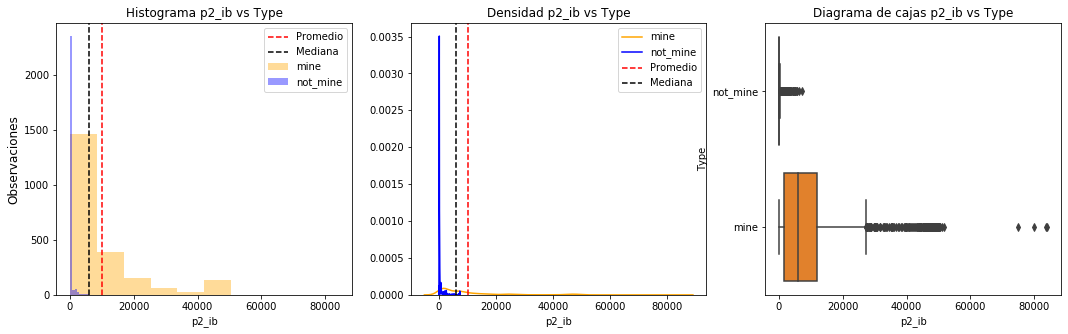

In [150]:
graf_plot(data_numeric_float[10],'Type','mine','not_mine')

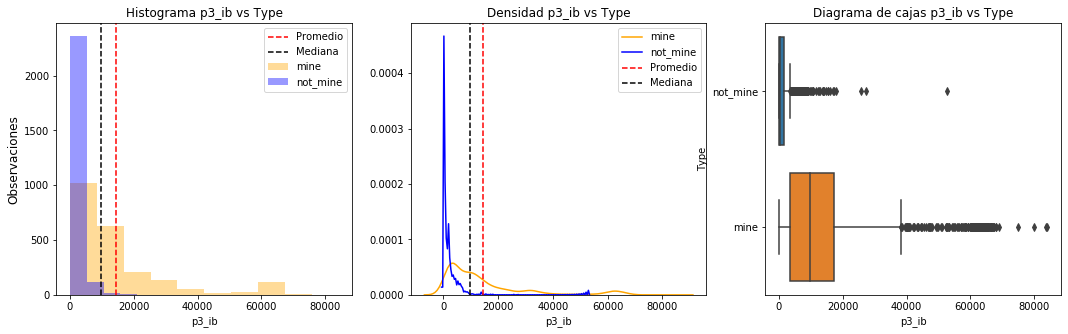

In [151]:
graf_plot(data_numeric_float[11],'Type','mine','not_mine')

### Variables Discretas

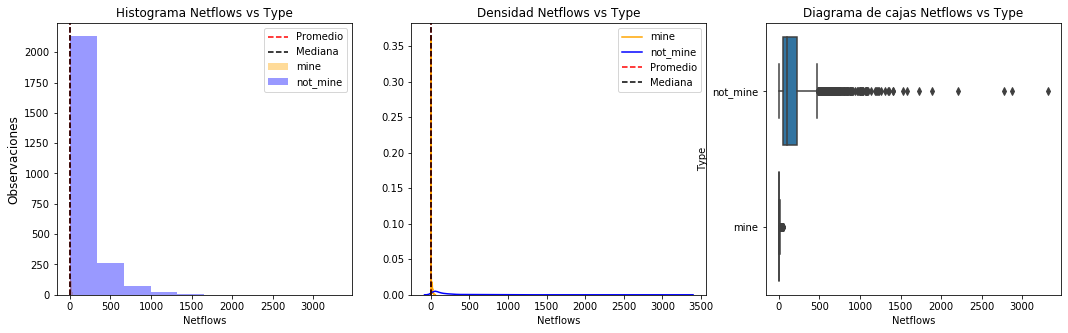

In [119]:
graf_plot(data_numeric_int[0],'Type','mine','not_mine')

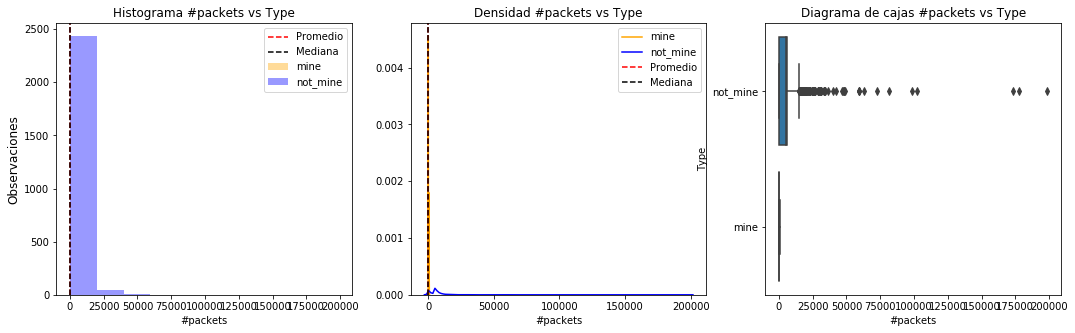

In [120]:
graf_plot(data_numeric_int[1],'Type','mine','not_mine')

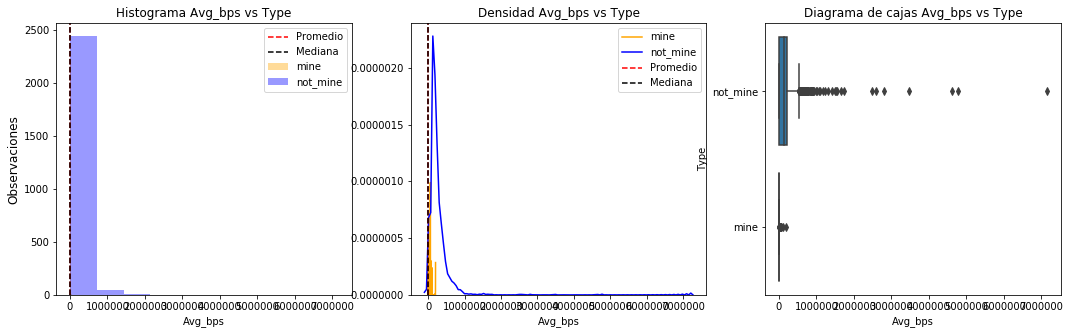

In [121]:
graf_plot(data_numeric_int[2],'Type','mine','not_mine')

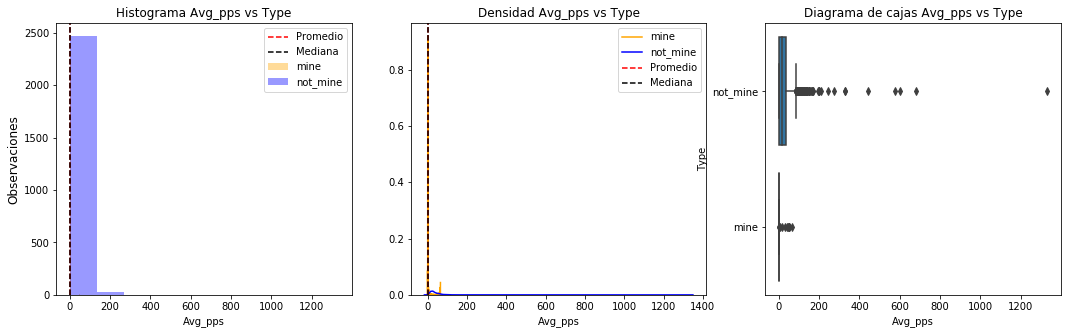

In [122]:
graf_plot(data_numeric_int[3],'Type','mine','not_mine')

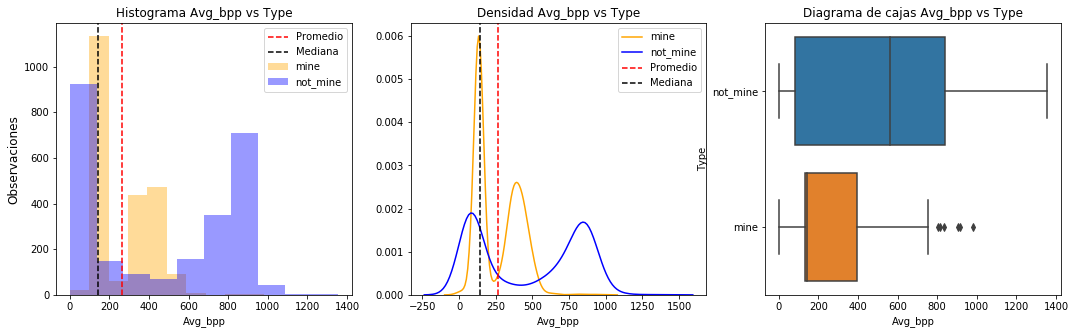

In [123]:
graf_plot(data_numeric_int[4],'Type','mine','not_mine')

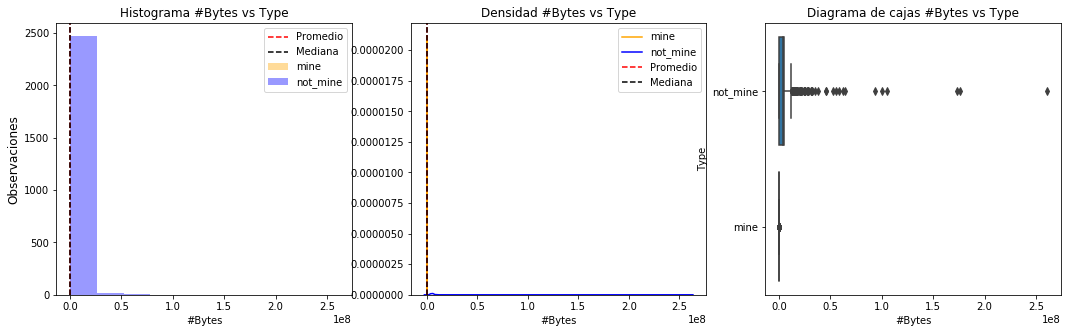

In [124]:
graf_plot(data_numeric_int[5],'Type','mine','not_mine')

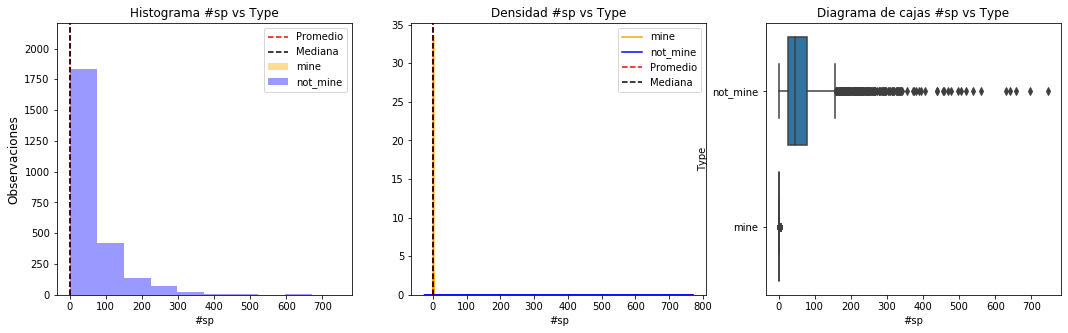

In [125]:
graf_plot(data_numeric_int[6],'Type','mine','not_mine')

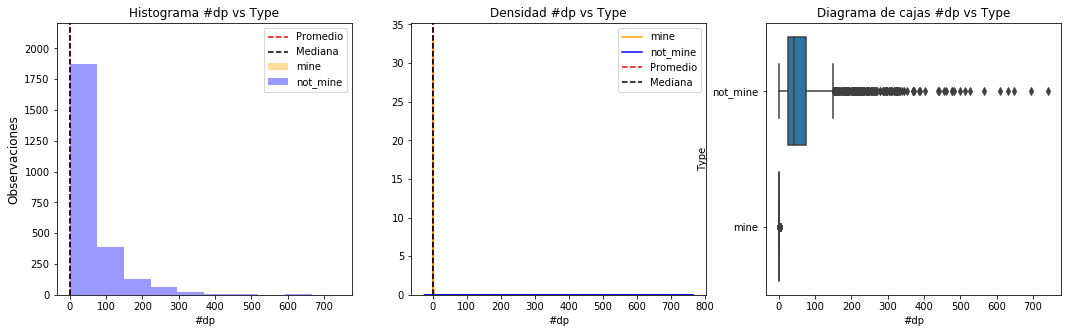

In [126]:
graf_plot(data_numeric_int[7],'Type','mine','not_mine')

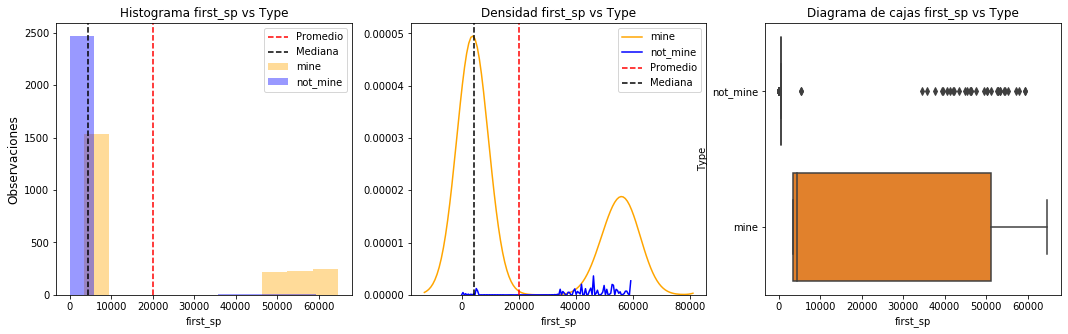

In [127]:
graf_plot(data_numeric_int[8],'Type','mine','not_mine')

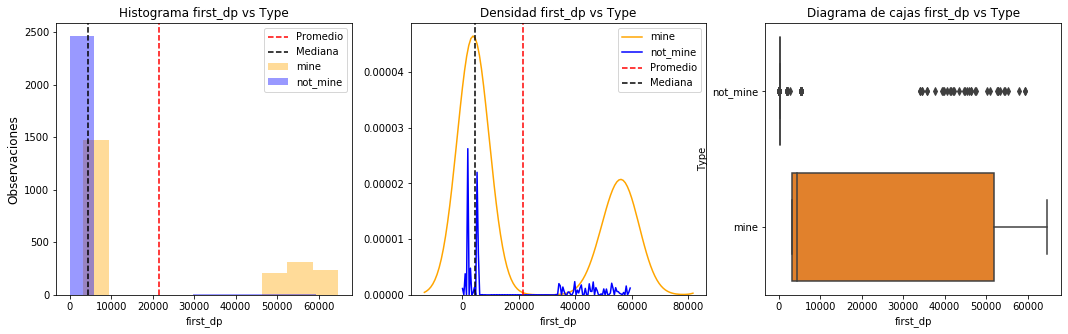

In [128]:
graf_plot(data_numeric_int[9],'Type','mine','not_mine')

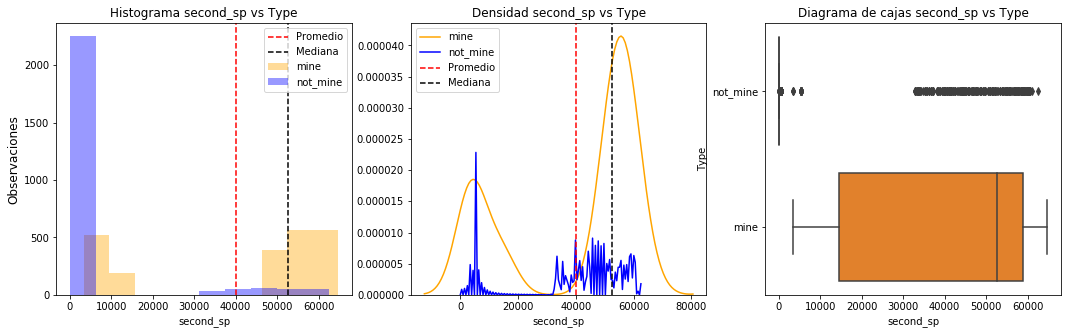

In [129]:
graf_plot(data_numeric_int[10],'Type','mine','not_mine')

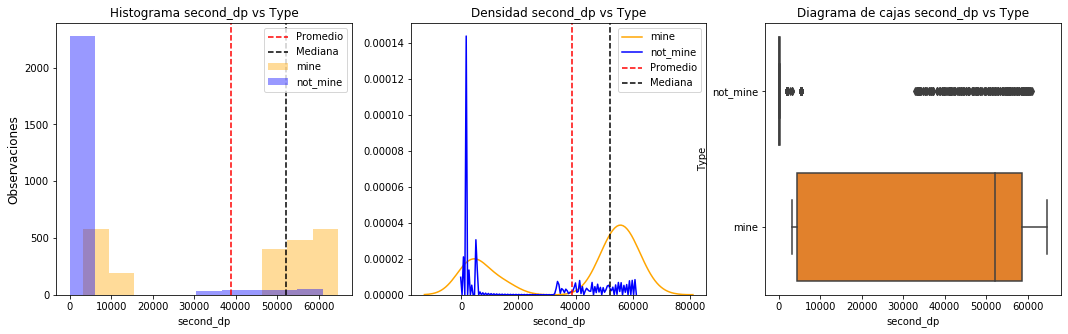

In [130]:
graf_plot(data_numeric_int[11],'Type','mine','not_mine')

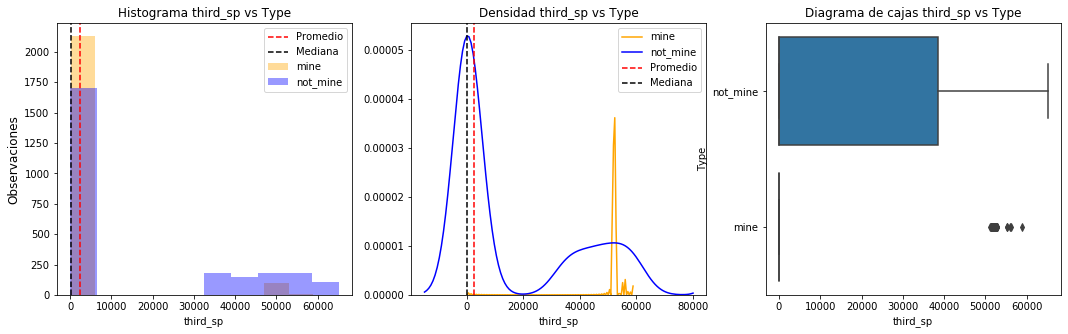

In [131]:
graf_plot(data_numeric_int[12],'Type','mine','not_mine')

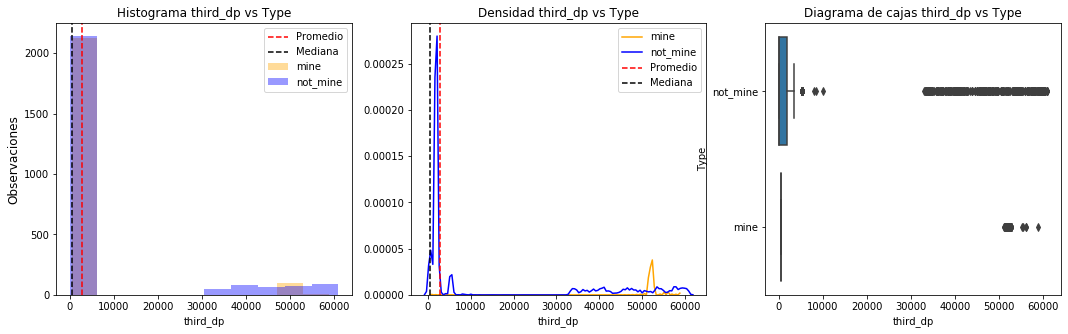

In [132]:
graf_plot(data_numeric_int[13],'Type','mine','not_mine')

In [70]:
data_n = pd.concat([data[data_numeric_float], data[data_numeric_int], data['Type']], axis = 1)
data_n.columns

Index(['p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d', 'p1_ip', 'p2_ip',
       'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib', 'Netflows', '#packets', 'Avg_bps',
       'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp', 'first_sp', 'first_dp',
       'second_sp', 'second_dp', 'third_sp', 'third_dp', 'Type'],
      dtype='object')

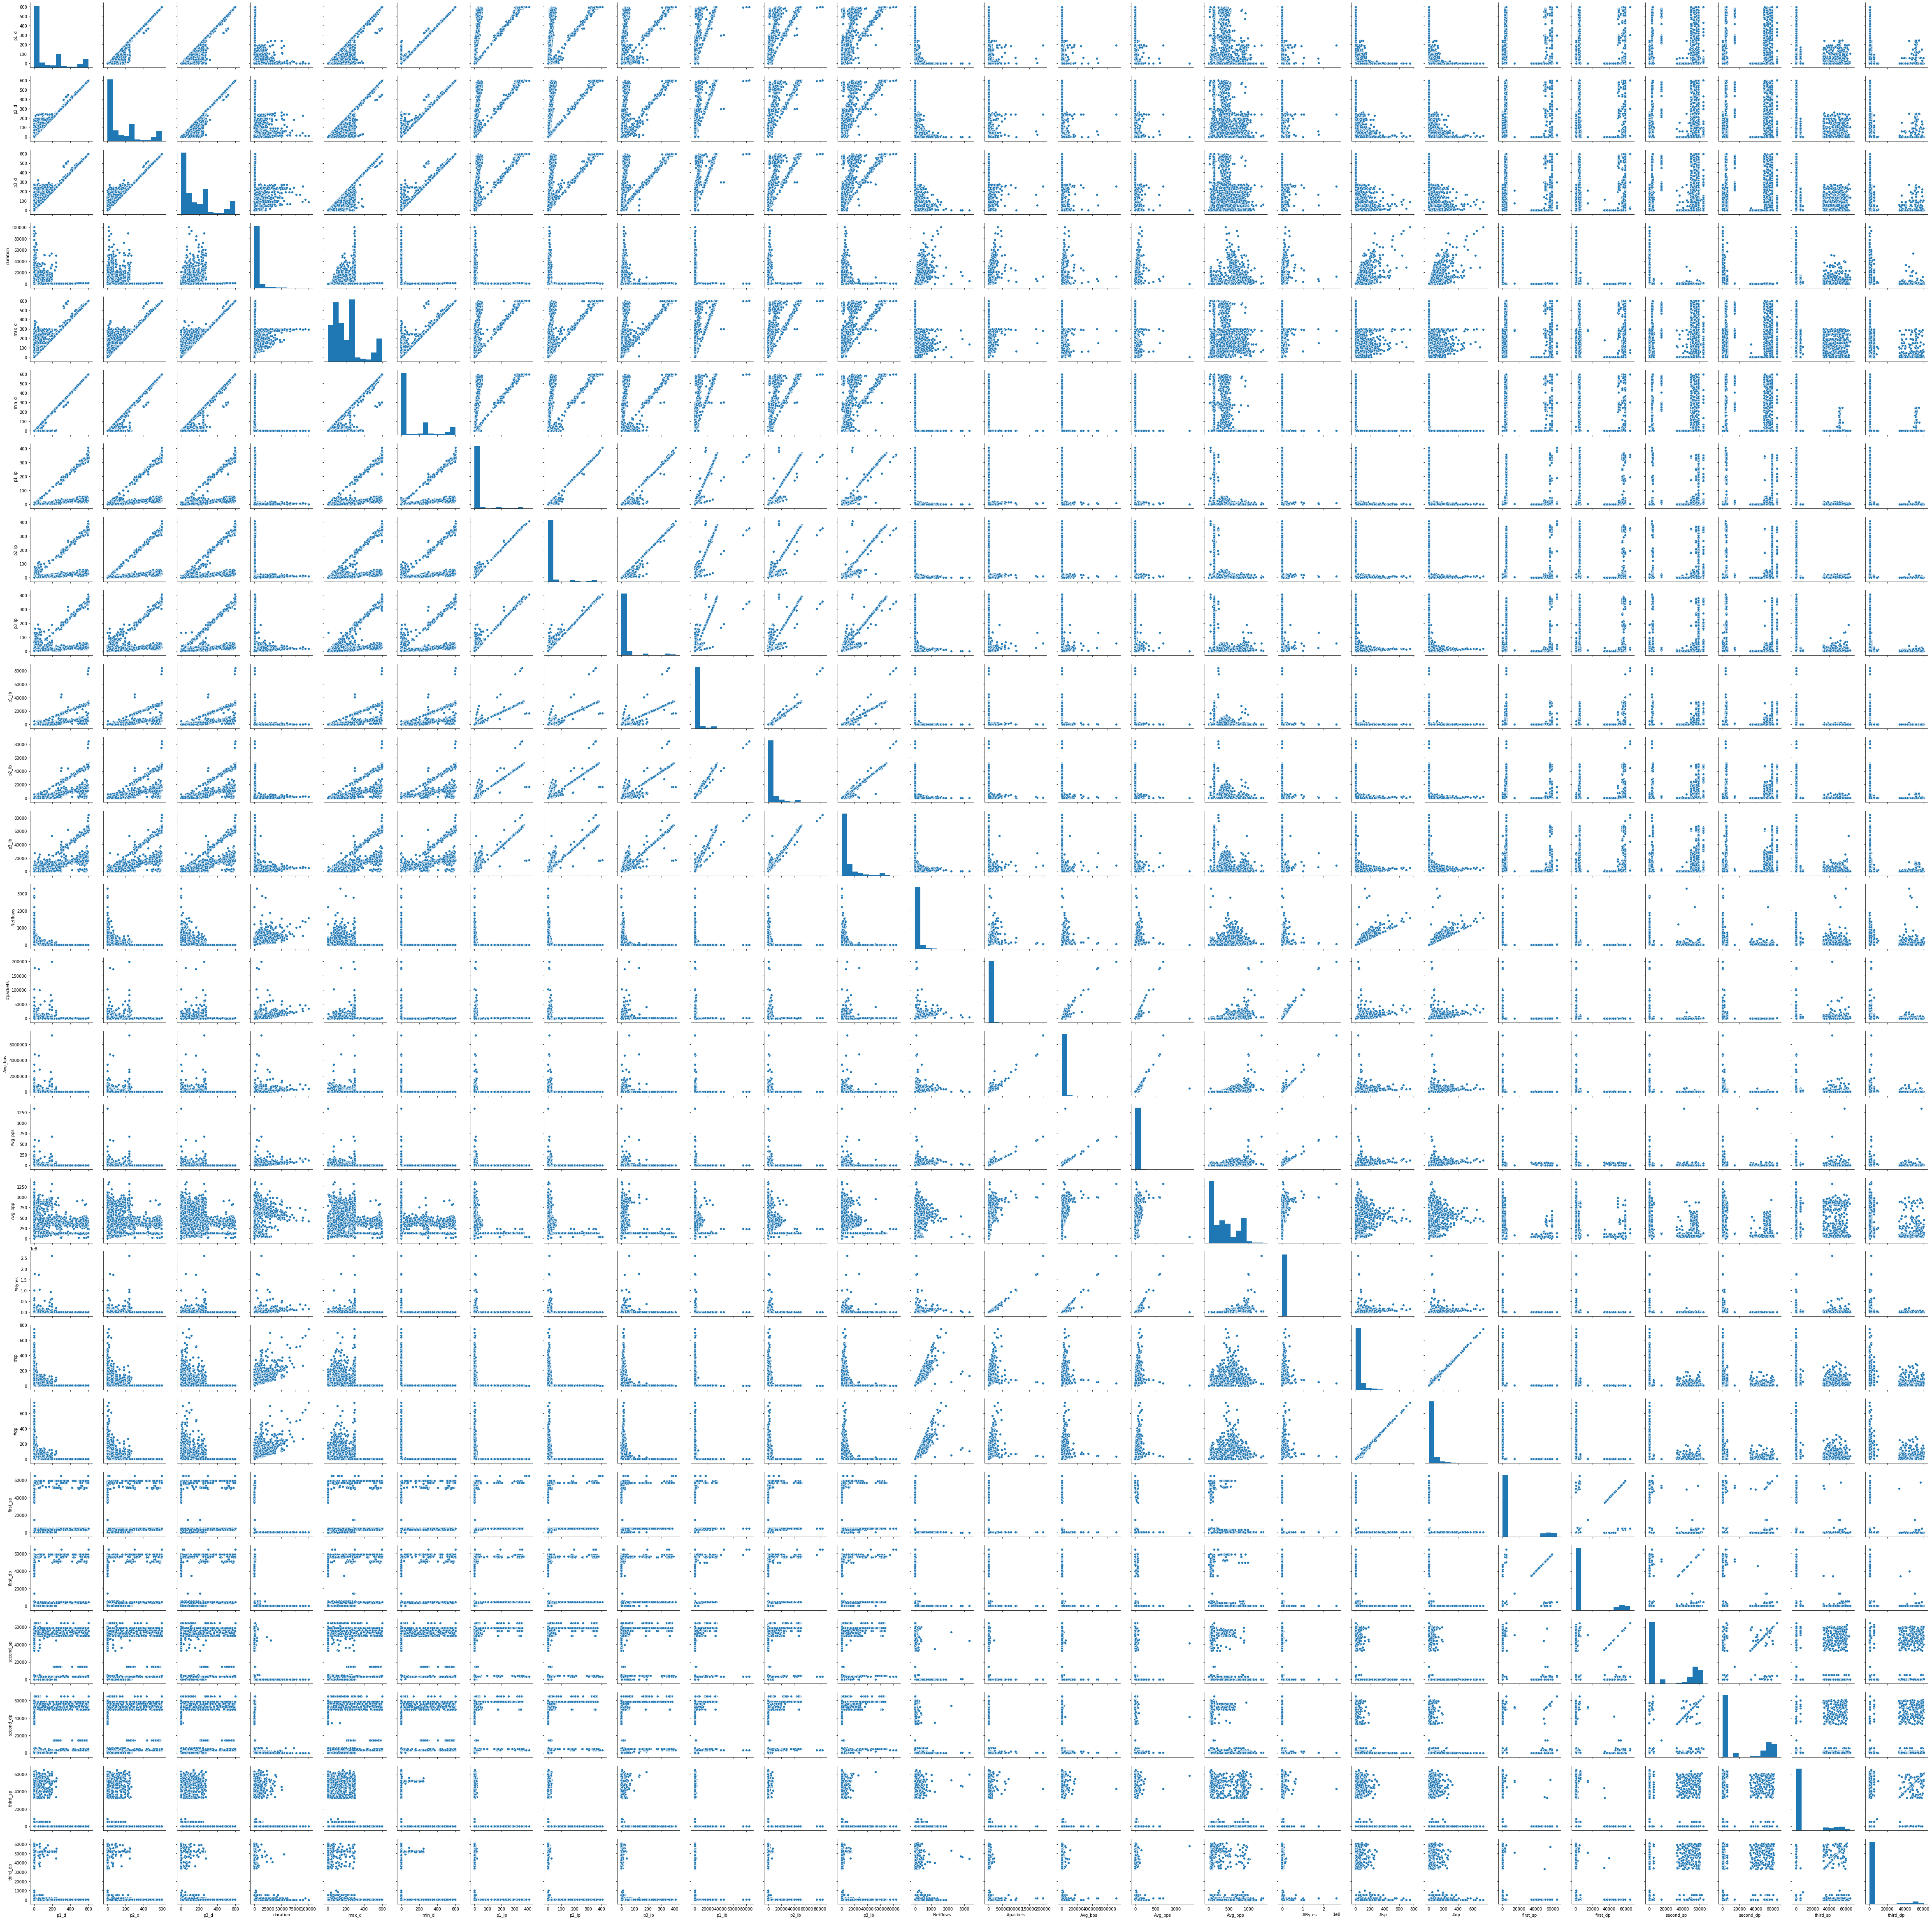

In [161]:
sns.pairplot(data_n)

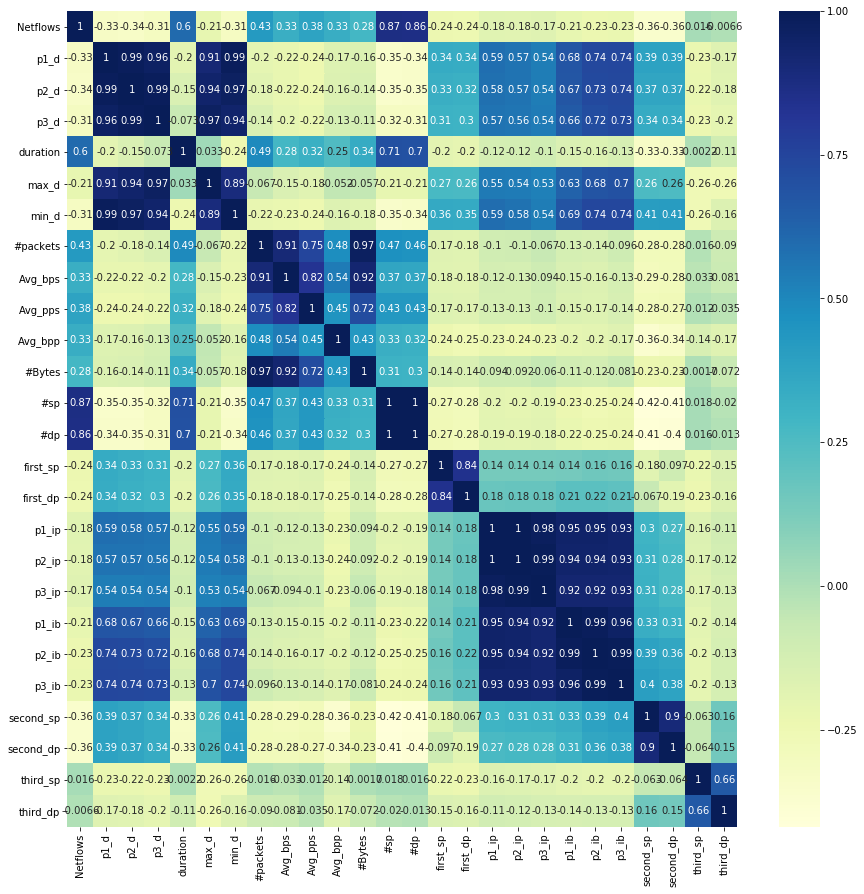

In [163]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")